### Cost function
- 머신러닝 모델 만들기
    - 학습데이터셋 $\rightarrow$ 학습 알고리즘 $\rightarrow$ 가설(모델)(Hypothesis) 설정
- 선형회귀 
    - 입력변수(특징) $x$가 하나인 경우, 주어진 학습데이터와 가장 잘 맞는 Hypothesis 함수 $h$를 찾는 문제
    - $h_{\theta}(x) = \theta_0 + \theta_1 x$
    - 각각의 데이터와 직선의 에러(잔차)가 가장 작도록 설정 : 각각의 에러 제곱의 평균의 합 $\Rightarrow$ Cost Function
    - CostFunc의 최소값을 찾는 것이 최적의 직선을 찾는 일

    - *그러나* 데이터의 특징(feature)이 여러개가 존재해 평면상의 방정식이 아닌 다차원에서 고민해야 할 때가 많다
        $\Rightarrow$ **Gradient Descent** (경사하강법) 
    
- 학습률(Learning rate) $\alpha$
    - $\theta := \theta - \alpha {d\over dt}J_\theta(x)$
    - $\alpha$는 얼마만큼 $\theta$를 갱신할 것인지를 설정하는 값
    - 학습률 작다면
        - 최솟값을 찾으러 가는 간격이 작게 됨
        - 여러번을 행신해야 하나 대신 최솟값에 잘 도달할 수 있음
    - 학습률 크다면
        - 최솟값을 찾으러 가는 간격이 크게 됨
        - 최솟값을 찾았다면 갱신횟수는 상대적으로 적을 수 있으나 수렴하지 않고 진동할 수도 있음

- 다변수 데이터에 대한 회귀
    - 여러개의 특성: Multivariate Linear Regression 문제로 일반화할 수 있음
    - 행렬식으로 표현

### Logistic Regression
- 선형회귀는 분류문제에 적용하기는 힘듦 $\Rightarrow$ Logistic Regression
- 분류문제는 0 또는 1로 예측해야 하나 Linear Regression을 그대로 적용하면 예측값 $h_\theta(x)$는 0보다 작거나 1보다 큰 값을 가질 수 있음
- $h_\theta(x)$가 항상 0에서 1사이의 값을 갖도록 Hypothesis 함수를 수정
    - $h_\theta(x) = g(\theta_0 + \theta_1 x)$
    - $g(z) = {1\over 1 + e^{-z}}$
    - $h_\theta(x)$는 주어진 입력 $x$에서의 예측결과가 1이 될 확률을 의미함
    - $h_\theta(x) >= 0.5$ : 1로 예측
    - $h_\theta(x) < 0.5$ : 1로 예측 
- CostFunc 재정의
    - $Cost(h_\theta(x), y)= \begin{cases} -log(h_\theta(x)) & \mbox{y = }\mbox{1} \\ -log(1-h_\theta(x)) & \mbox{y = }\mbox{0} \end{cases} $
    

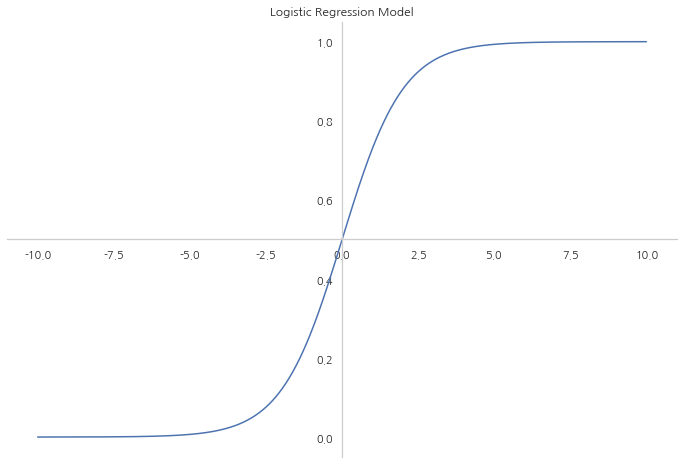

In [4]:
%matplotlib inline
z = np.arange(-10, 10, 0.01)
g = 1 / (1 + np.exp(-z))

plt.figure(figsize=(12, 8))
ax = plt.gca()
ax.plot(z, g)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
plt.title('Logistic Regression Model')
plt.grid(False);

### 앙상블 기법
- 여러개의 분류기를 생성하고 그 예측을 결합하여 정확한 최종 예측을 기대하는 기법
- 다양한 분류기의 예측 결과를 결합함으로써 단일 분류기보다 신뢰성이 높은 예측 값을 얻는 것이 목표
- 현재 정형데이터를 대상으로 하는 분류기에서는 앙상블 기법이 뛰어난 성과를 보여주고 있음
---
- 부트스트래핑(bootstrapping) 분할
    - 각 분류기에 데이터를 각각 샘플링해서 추출하는 방식

    - **voting** 
        - 서로 다른 알고리즘에 data set을 적용시킨 결과를 투표로 최종결정을 내림
        - 모든 알고리즘에 전체 data set을 적용
            - 하드보팅 : 1로 예측한 결과가 많으면 1로 결정(다수결의 원칙)
            - 소프트보팅 : 예측한 결과 별 평균을 비교해 결정
    - **bagging**
        - data set을 sampling(중복 허용)하여 각각의 데이터에 같은 알고리즘을 적용해서 결과를 투표로 결정
---
- 랜덤포레스트
    - 같은 알고리즘으로 구현하는 배깅(bagging)의 대표적인 방법
    - 앙상블 방법 중에서 비교적 속도가 빠르며 다양한 영역에서 높은 성능을 보여주고 있음
    - 결정나무를 기본으로 함
    - 부트스트래핑으로 샘플링된 데이터마다 결정나무가 예측한 결과를 소프트보팅으로 최종 예측 결론을 얻음

- HAR(Human Activity Recognition)
    - IMU센서를 활용해서 사람의 생동을 인식하는 실험
    - 폰에 있는 가속도/자이로 센서 사용
    - 시간영역 데이터를 머신러닝에 적용하기 위해 통계적 데이터로 변환


- Boosting 
    - 여러 개의 (약한)분류기가 순차적으로 학습을 하면서, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해 다음 분류기가 가중치를 인가해서 학습을 이어 진행하는 방식
    - 예측 성능이 뛰어나서 앙상블 학습을 주도하고 있음
    
| Bagging | Boosting |
|----|----|
|한번에 병렬적으로 결과를 얻음|순차적으로 진행됨|
|(Parallel)|(Sequential)|    
    
- Adaboost : Decision Tree 기반의 알고리즘
    - 1. 순차적으로 가중치를 부여해서 최종 결과를 얻음
    - 2. 1에서 틀린 +에 가중치를 인가하고 다시 경계를 결정
    - 3. 다시 놓친 -에 가중치를 인가하고 다시 경계를 설정
    - 4. 앞서 결정한 경계들을 합침
- GBM(Gradient Boosting Machine) : AdaBoost와 비슷하지만, 가중치를 업데이트할 때 경사하강법(Gradient Descent)을 사용
- XGBoost(eXtra Gradient Boost) : GBM에서 PC의 파워를 효율적으로 사용하기 위한 다양한 기법에 채택되어 빠른 속도와 효율을 가짐
- LightGBM : XGBoost보다 빠른 속도를 가짐
   